In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


##### Reading data

In [5]:
data = pd.read_csv('/home/hasan/Desktop/DATA_SET/name-age-salary.csv')


In [6]:
data.head()

,NAME,AGE,SALARY
0,A,33,40000
1,B,55,66000
2,C,26,38000
3,B,67,125000
4,D,89,130000


##### Drop NAME column

In [7]:
drop_name = data
drop_name = drop_name.drop('NAME', axis=1)

In [8]:
drop_name.head()

,AGE,SALARY
0,33,40000
1,55,66000
2,26,38000
3,67,125000
4,89,130000


##### plotting

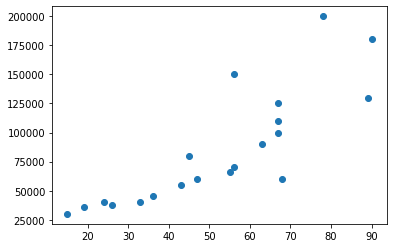

In [9]:
plt.scatter(drop_name['AGE'], drop_name['SALARY'])

##### Algorithm

In [10]:
KMC = KMeans(n_clusters=4)
predict = KMC.fit_predict(drop_name)

##### new column

In [11]:
data['group'] = predict

In [12]:
data.head()

,NAME,AGE,SALARY,group
0,A,33,40000,3
1,B,55,66000,1
2,C,26,38000,3
3,B,67,125000,2
4,D,89,130000,2


In [13]:
g1 = data[data['group']==0]
g2 = data[data['group']==1]
g3 = data[data['group']==2]
g4 = data[data['group']==3]

No handles with labels found to put in legend.


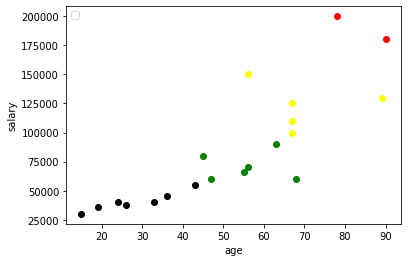

In [14]:
plt.scatter(g1['AGE'], g1['SALARY'], color='red')
plt.scatter(g2['AGE'], g2['SALARY'], color='green')
plt.scatter(g3['AGE'], g3['SALARY'], color='yellow')
plt.scatter(g4['AGE'], g4['SALARY'], color='black')
plt.xlabel('age')
plt.ylabel('salary')
plt.legend(loc='upper left')

In [15]:
scaler = MinMaxScaler()

scaler.fit(drop_name[['SALARY']])
scaler.fit(drop_name[['AGE']])
data['SALARY'] = scaler.transform(drop_name[['SALARY']])
data['AGE'] = scaler.transform(drop_name[['AGE']])

In [16]:
data.head()

,NAME,AGE,SALARY,group
0,A,0.240000,533.133333,3
1,B,0.533333,879.800000,1
2,C,0.146667,506.466667,3
3,B,0.693333,1666.466667,2
4,D,0.986667,1733.133333,2


##### algorithm

In [17]:
KMC = KMeans(n_clusters=4)
predict = KMC.fit_predict(data[['AGE']], data[['SALARY']])

In [18]:
predict

array([1, 2, 3, 2, 0, 1, 2, 3, 2, 1, 1, 2, 0, 1, 2, 2, 3, 3, 2, 0],
      dtype=int32)

In [19]:
data['group'] = predict

In [20]:
data.head()

,NAME,AGE,SALARY,group
0,A,0.240000,533.133333,1
1,B,0.533333,879.800000,2
2,C,0.146667,506.466667,3
3,B,0.693333,1666.466667,2
4,D,0.986667,1733.133333,0


In [21]:
KMC.cluster_centers_

array([[0.94222222],
       [0.344     ],
       [0.63166667],
       [0.08      ]])

No handles with labels found to put in legend.


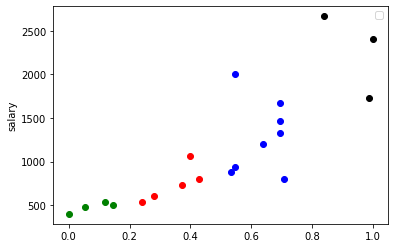

In [22]:
g1 = data[data.group==0]
g2 = data[data.group==1]
g3 = data[data.group==2]
g4 = data[data.group==3]
plt.scatter(g1['AGE'],g1['SALARY'], color='black')
plt.scatter(g2['AGE'],g2['SALARY'], color='red')
plt.scatter(g3['AGE'],g3['SALARY'], color='blue')
plt.scatter(g4['AGE'],g4['SALARY'], color='green')
plt.ylabel('salary')
plt.legend(loc='best')